# 오토인코더

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
batch_size = 256
learning_rate = 0.0002
num_epoch = 10

데이터 준비

In [3]:
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)  # DataLoader에서 numpy 배열인 이미지를 텐서로 바꿔주는거임
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Linear(28*28, 20)   # MNIST의 28*28 이미지를 20차원 벡터로 압축
        self.decoder = nn.Linear(20, 28*28)   # 압축된 20차원 벡터를 다시 28*28로 복원 

    def forward(self, x):
        x = x.view(batch_size, -1)
        encoded = self.encoder(x)
        out = self.decoder(encoded).view(batch_size, 1, 28, 28)
        return out

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = Autoencoder().to(device)
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

cpu


In [6]:
loss_arr =[]
for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x = image.to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,x)
        loss.backward()
        optimizer.step()
        
    print(loss)
    loss_arr.append(loss.item())

tensor(0.0658, grad_fn=<MseLossBackward0>)
tensor(0.0583, grad_fn=<MseLossBackward0>)
tensor(0.0547, grad_fn=<MseLossBackward0>)
tensor(0.0484, grad_fn=<MseLossBackward0>)
tensor(0.0439, grad_fn=<MseLossBackward0>)
tensor(0.0384, grad_fn=<MseLossBackward0>)
tensor(0.0384, grad_fn=<MseLossBackward0>)
tensor(0.0346, grad_fn=<MseLossBackward0>)
tensor(0.0332, grad_fn=<MseLossBackward0>)
tensor(0.0322, grad_fn=<MseLossBackward0>)


torch.Size([256, 28, 28])


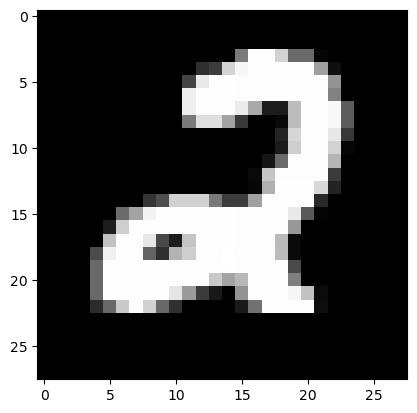

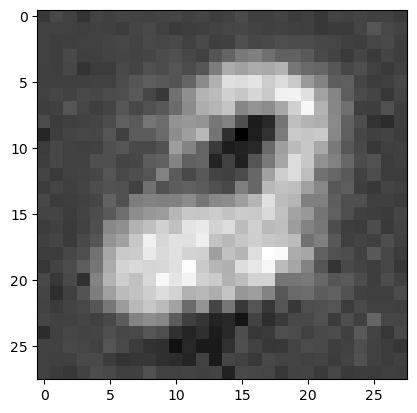

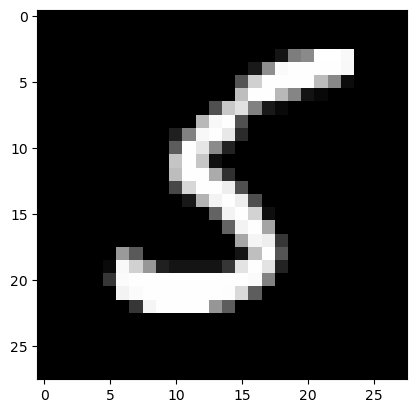

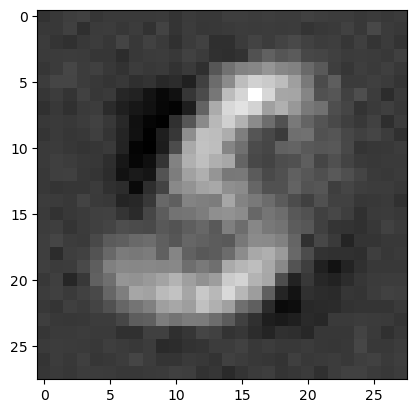

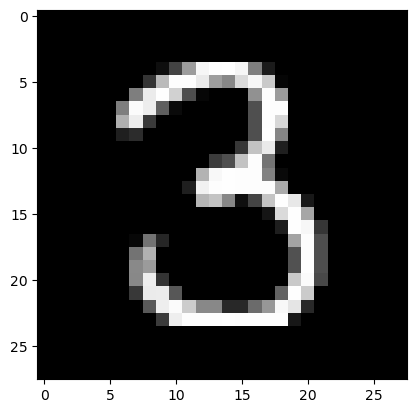

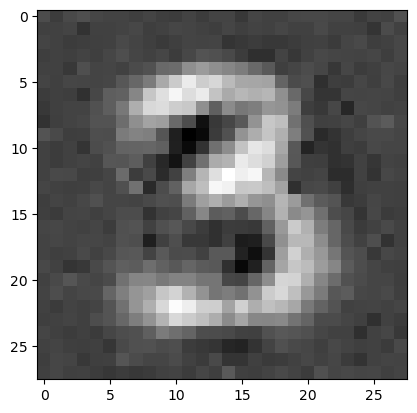

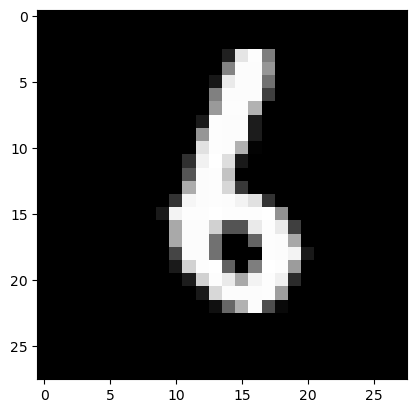

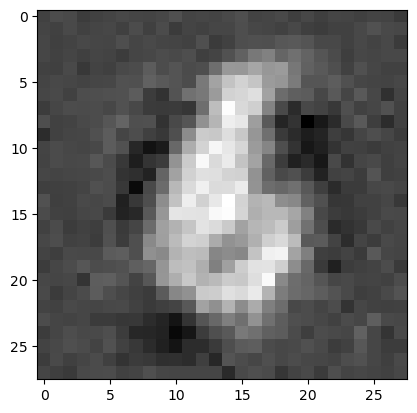

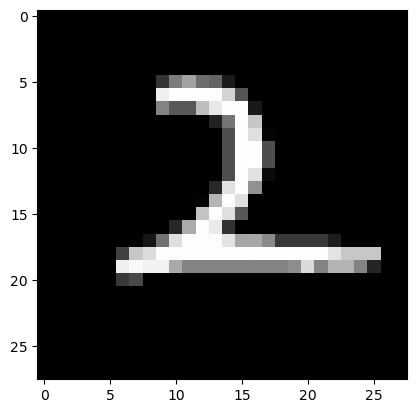

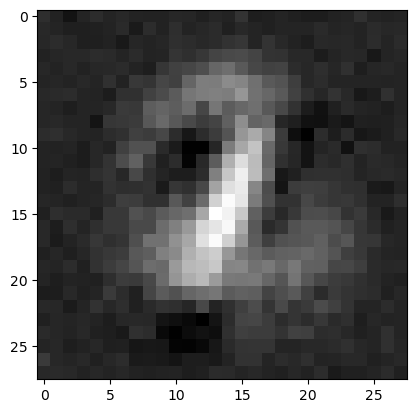

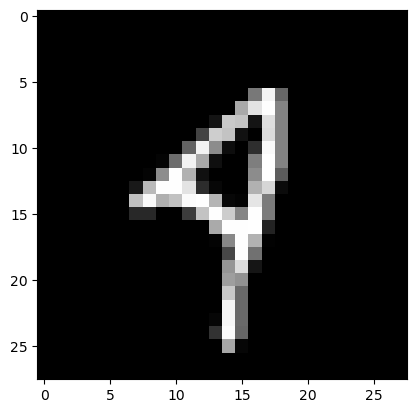

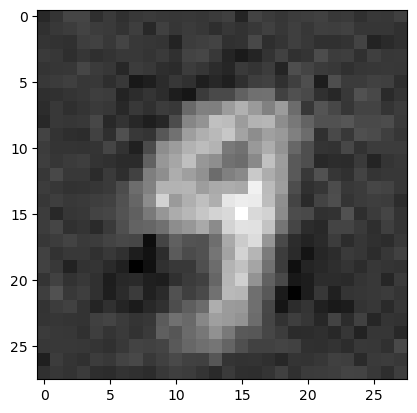

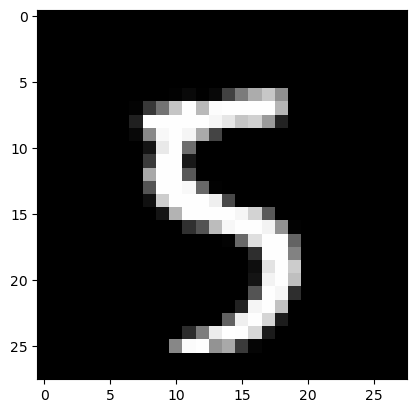

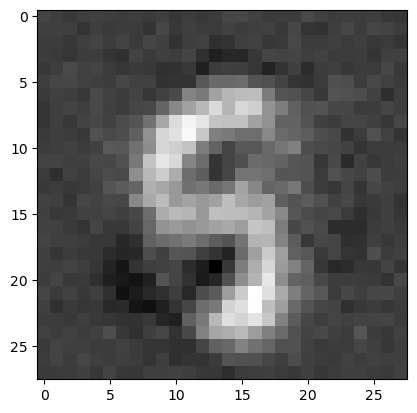

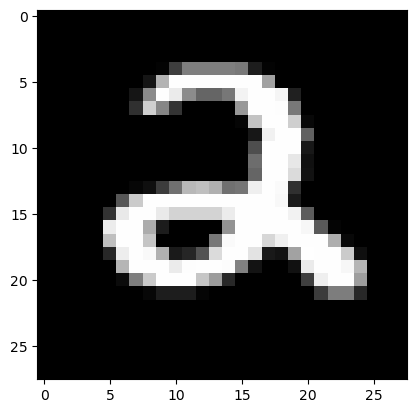

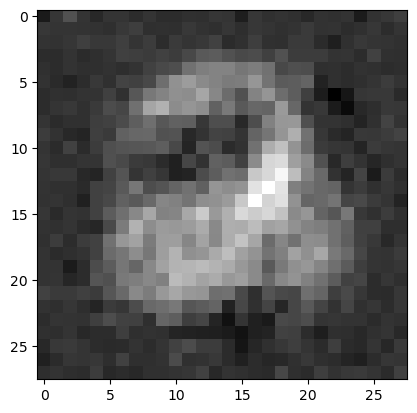

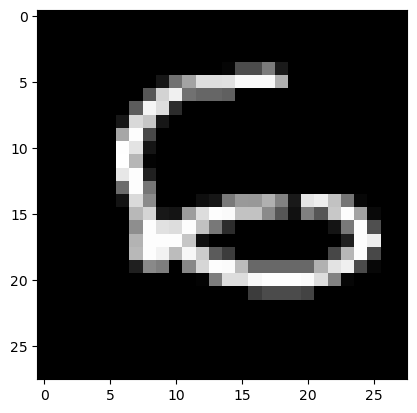

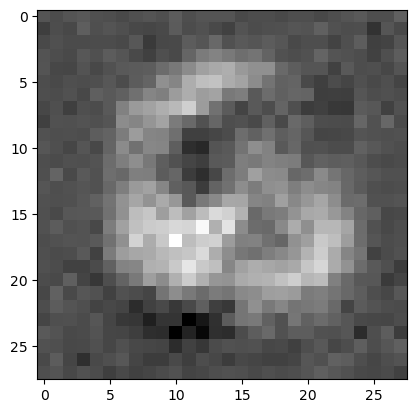

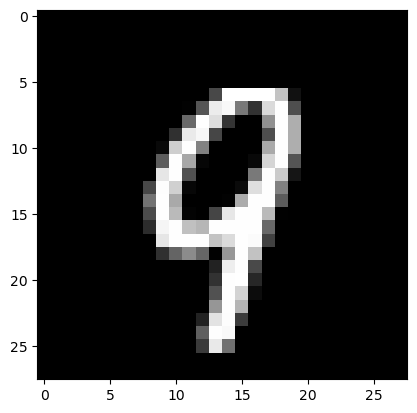

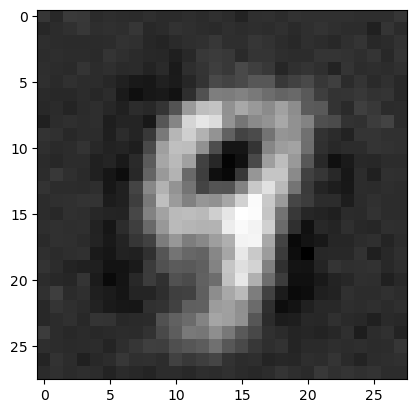

In [7]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(10):
    plt.imshow(torch.squeeze(image[i]).numpy(),cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()

In [8]:
with torch.no_grad():
  for i in range(1):
      for j,[image,label] in enumerate(test_loader):
          x = image.to(device)

          optimizer.zero_grad()
          output = model.forward(x)

      if j % 1000 == 0:
          print(loss)        

torch.Size([256, 28, 28])


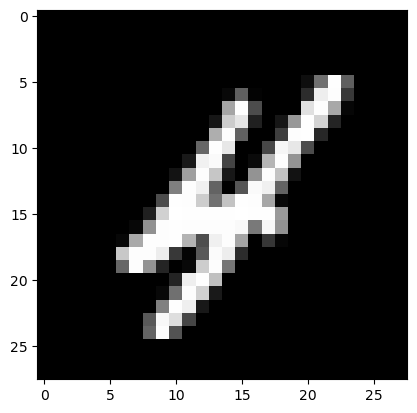

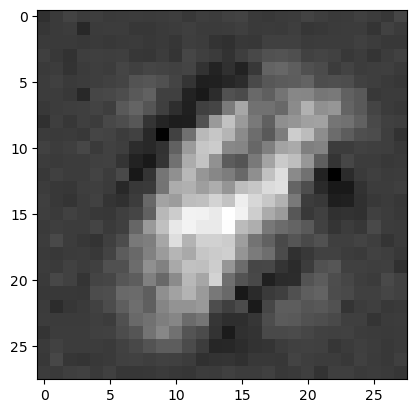

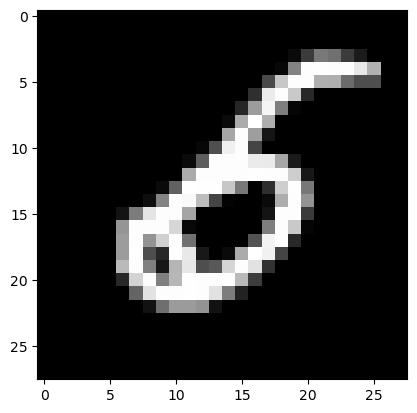

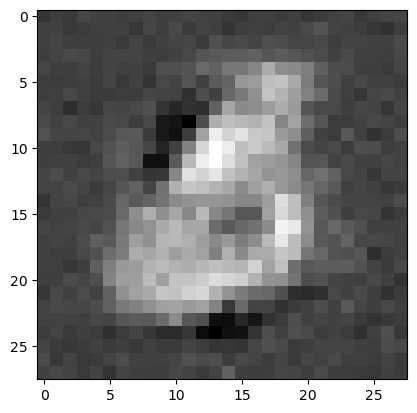

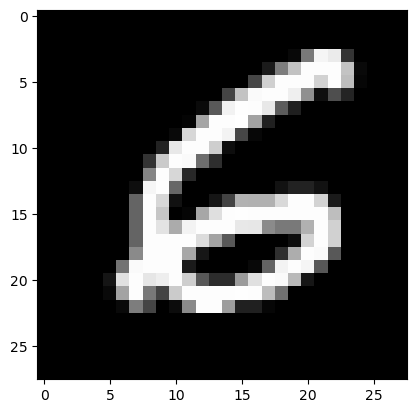

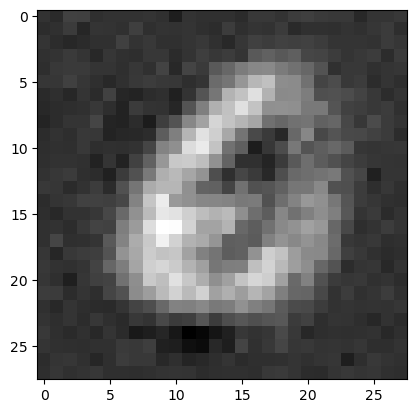

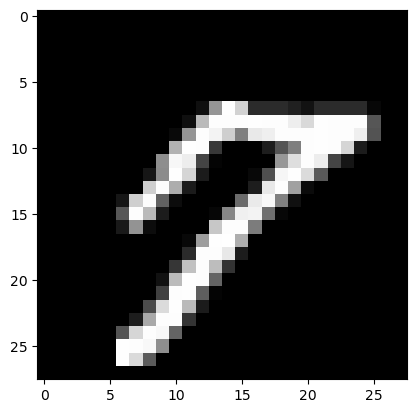

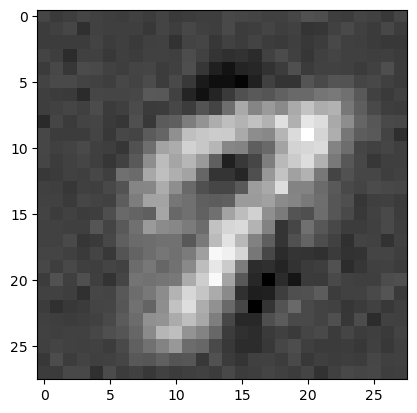

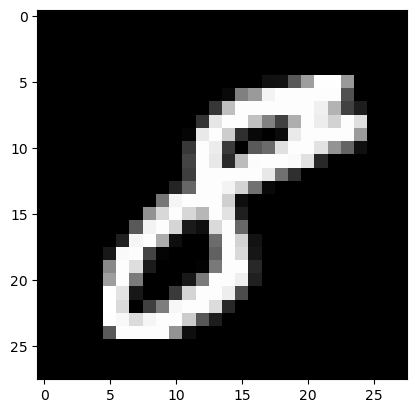

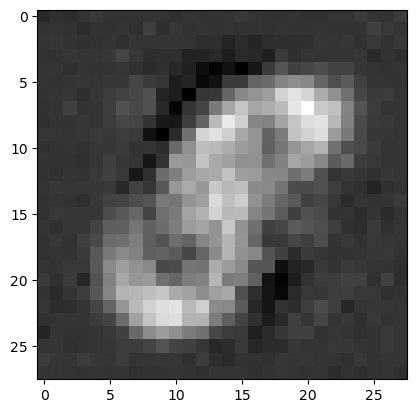

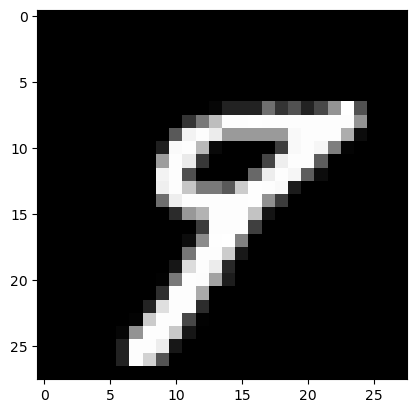

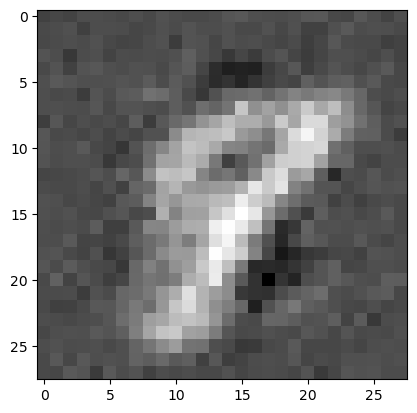

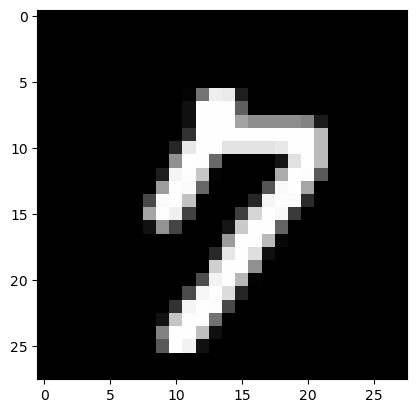

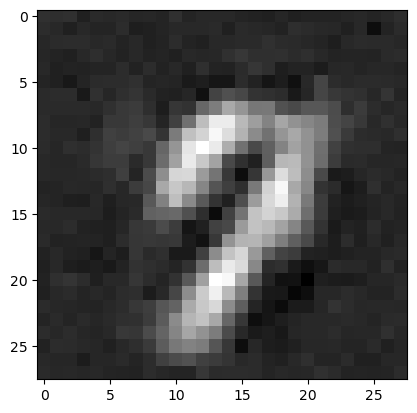

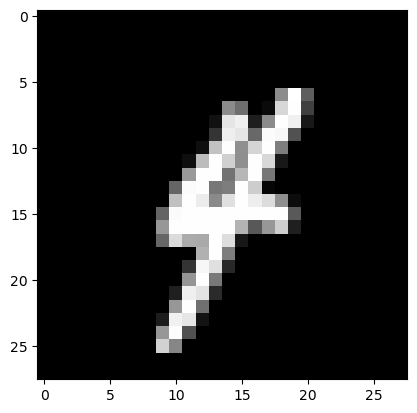

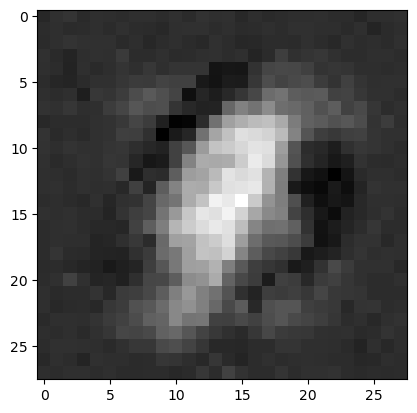

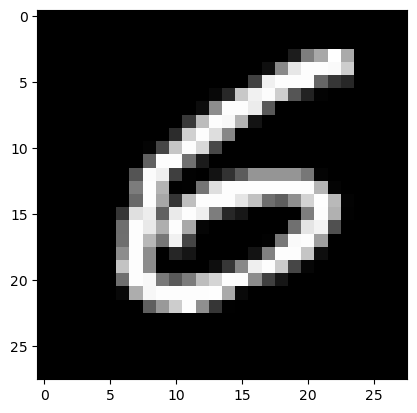

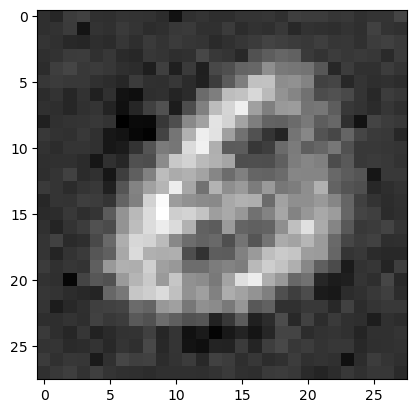

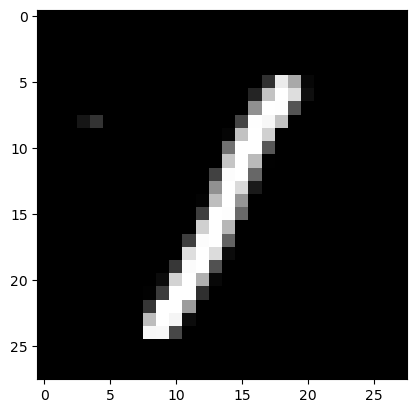

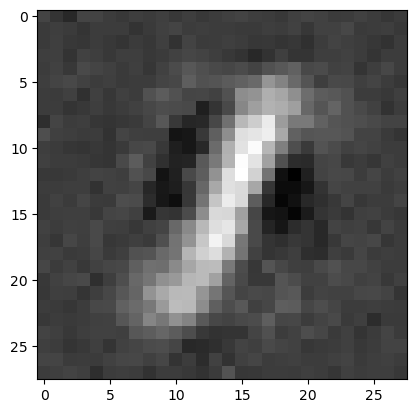

In [9]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(10):
    plt.imshow(torch.squeeze(image[i]).numpy(),cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()